<a href="https://colab.research.google.com/github/JoseNormando/Projeto_Trigo_Brasil_UFRN/blob/main/trigo_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Variáveis utilizadas**

**Para Produção**

> Área Plantada em hectares (ha)
***

>Área colhida em hectares (ha)
***

>Quantidade produzida em toneladas (ton)
***

**Para Importação e Exportação**
>Volume em tonelada líquida (ton/liq)
***

# **Fonte dos Dados**

> https://sidra.ibge.gov.br/pesquisa/pam/tabelas

> https://www.abitrigo.com.br/categoria-estatisticas/importacao-e-exportacao/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
!python -V

Python 3.10.12


# **1 - Importando a Base de Dados do Brasil**

In [3]:
anos = list(map(str, range(1988, 2022)))

In [4]:
area_plantada_brasil = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos/Arquivos/textos_tecnicos/area_plantada_brasil.xlsx')
area_plantada_brasil

,Pais,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Brasil,3594920,3408188,3349956,2064561,1973120,1540267,1472083,1036343,1825648,...,1941703,2225401,2836786,2490115,2167539,1912129,2090130,2119649,2433118,2776044


In [5]:
quantidade_produzida_brasil = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos/Arquivos/textos_tecnicos/quantidade_produzida(ton)_brasil.xlsx')
quantidade_produzida_brasil

,Pais,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Brasil,5737971,5552841,3093791,2916823,2795598,2197354,2096259,1533871,3292777,...,4418388,5738473,6261895,5508451,6834421,4342812,5469236,5590815,6344079,7878413


# **2 - Importando a Base de Dados por Região**

In [6]:
area_plantada_regiao = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos/Arquivos/textos_tecnicos/area_plantada(ha) _regiao.xlsx')
area_plantada_regiao.set_index('Regiao', inplace = True)
area_plantada_regiao

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Regiao,,,,,,,,,,,,,,,,,,,,,
Norte,1682423,2360519,1968752,1967119,2257442,2202295,2413668,2450271,2192795,2188283,...,2972418,3232726,3627845,3759487,4029599,4043178,4312330,4712142,5178672,97762348
Nordeste,14685229,14321937,12934412,13490443,13550964,11509921,13589143,13278429,10706352,11176586,...,11442041,12501736,12246714,11419435,11336911,11277738,11049599,11136821,11421322,415393436
Sudeste,12738304,12586765,12188201,12174413,12087219,11326494,11667910,11359773,10791387,10974669,...,14287231,14628759,14707236,14905786,14821058,14683115,15170061,15374638,15504216,436733484
Sul,18949173,18807454,18574922,17592576,17320180,16942083,17097150,16565732,15852223,16059168,...,20857716,21386148,21186782,21243901,21299307,21065460,21400782,21909991,22672953,646382394
Centro-Oeste,8691398,8338615,7486159,6528527,7057774,7245959,8047159,8198905,7279057,7903699,...,22874728,24481495,25179522,26008659,27503335,27516704,29277085,30252884,31895069,536784809
Total,56746527,56415290,53152446,51753078,52273579,49226752,52815030,51853110,46821814,48302405,...,72434134,76230864,76948099,77337268,78990210,78586195,81209857,83386476,86672232,2133056471


In [7]:
area_colhida_regiao = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos/Arquivos/textos_tecnicos/area_colhida(ha)_regiao.xlsx')
area_colhida_regiao.set_index('Regiao', inplace = True)
area_colhida_regiao

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Regiao,,,,,,,,,,,,,,,,,,,,,
Norte,1640957,2311859,1896969,1904254,1978781,2161358,2346957,2375454,2129051,2136011,...,2931294,3203976,3608854,3697561,4016030,4031375,4287907,4691129,5170683,95780496
Nordeste,14142865,13799435,11627298,13017474,12580279,9266061,12904959,12823045,10234016,10791492,...,10745108,11881156,11549019,10467273,10742821,10786520,10680679,10979380,11093947,391628407
Sudeste,12637509,12477421,12077293,12141365,11998512,11280357,11647862,11271316,10782181,10958091,...,14152469,14517388,14552639,14735142,14758505,14629281,15074707,15335858,15434519,434032736
Sul,18643483,18552032,17778746,17170425,17289796,16890845,16552762,16223358,15374550,15836180,...,20619031,21350988,21142453,21147577,21218795,20959334,21315889,21876841,22526067,637906209
Centro-Oeste,8398853,8113781,7134390,6410355,6867231,7030681,7901493,8083544,7214109,7884397,...,22846477,24418293,25131430,25412209,27463325,27492465,29250836,30245304,31622244,532332014
Total,55463667,55254528,50514696,50643873,50714599,46629302,51354033,50776717,45733907,47606171,...,71294379,75371801,75984395,75459762,78199476,77898975,80610018,83128512,85847460,2091679862


In [8]:
quantidade_produzida_regiao = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos/Arquivos/textos_tecnicos/quantidade_produzida(ton)_regiao.xlsx')
quantidade_produzida_regiao.set_index('Regiao', inplace = True)
quantidade_produzida_regiao

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Regiao,,,,,,,,,,,,,,,,,,,,,
Norte,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Nordeste,-,-,-,-,-,-,-,-,-,-,...,-,-,3000,19800,12976,26850,14600,17027,17737,120520
Sudeste,385481,384639,217562,148293,110661,103438,51273,49489,39790,41843,...,203846,437303,565969,580443,580858,499917,615703,729444,642675,8589229
Sul,4936438,4795170,2670968,2612134,2565465,2011140,1957518,1457089,3171456,2385577,...,5501542,5748132,4853936,6120603,3647362,4828920,4842569,5402126,7097820,135825891
Centro-Oeste,416052,373032,205261,156396,119472,82776,87468,27293,81531,61650,...,33085,76460,85546,113575,101616,113549,117943,195482,116293,4657552
Total,5737971,5552841,3093791,2916823,2795598,2197354,2096259,1533871,3292777,2489070,...,5738473,6261895,5508451,6834421,4342812,5469236,5590815,6344079,7874525,149193192


In [9]:
display(area_plantada_regiao.info())
display(area_colhida_regiao.info())
display(quantidade_produzida_regiao.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Norte to Total
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1988    6 non-null      int64
 1   1989    6 non-null      int64
 2   1990    6 non-null      int64
 3   1991    6 non-null      int64
 4   1992    6 non-null      int64
 5   1993    6 non-null      int64
 6   1994    6 non-null      int64
 7   1995    6 non-null      int64
 8   1996    6 non-null      int64
 9   1997    6 non-null      int64
 10  1998    6 non-null      int64
 11  1999    6 non-null      int64
 12  2000    6 non-null      int64
 13  2001    6 non-null      int64
 14  2002    6 non-null      int64
 15  2003    6 non-null      int64
 16  2004    6 non-null      int64
 17  2005    6 non-null      int64
 18  2006    6 non-null      int64
 19  2007    6 non-null      int64
 20  2008    6 non-null      int64
 21  2009    6 non-null      int64
 22  2010    6 non-null      int64
 23  2011    6 non-nu

None

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Norte to Total
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1988    6 non-null      int64
 1   1989    6 non-null      int64
 2   1990    6 non-null      int64
 3   1991    6 non-null      int64
 4   1992    6 non-null      int64
 5   1993    6 non-null      int64
 6   1994    6 non-null      int64
 7   1995    6 non-null      int64
 8   1996    6 non-null      int64
 9   1997    6 non-null      int64
 10  1998    6 non-null      int64
 11  1999    6 non-null      int64
 12  2000    6 non-null      int64
 13  2001    6 non-null      int64
 14  2002    6 non-null      int64
 15  2003    6 non-null      int64
 16  2004    6 non-null      int64
 17  2005    6 non-null      int64
 18  2006    6 non-null      int64
 19  2007    6 non-null      int64
 20  2008    6 non-null      int64
 21  2009    6 non-null      int64
 22  2010    6 non-null      int64
 23  2011    6 non-nu

None

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Norte to Total
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1988    6 non-null      object
 1   1989    6 non-null      object
 2   1990    6 non-null      object
 3   1991    6 non-null      object
 4   1992    6 non-null      object
 5   1993    6 non-null      object
 6   1994    6 non-null      object
 7   1995    6 non-null      object
 8   1996    6 non-null      object
 9   1997    6 non-null      object
 10  1998    6 non-null      object
 11  1999    6 non-null      object
 12  2000    6 non-null      object
 13  2001    6 non-null      object
 14  2002    6 non-null      object
 15  2003    6 non-null      object
 16  2004    6 non-null      object
 17  2005    6 non-null      object
 18  2006    6 non-null      object
 19  2007    6 non-null      object
 20  2008    6 non-null      object
 21  2009    6 non-null      object
 22  2010    6 non-null      obj

None

## **2.1 - Tratando os dados de quantidade por Região**

In [10]:
quantidade_produzida_regiao.replace('-', 0, inplace = True)
quantidade_produzida_regiao.loc[:, anos].astype(int)
display(quantidade_produzida_regiao)
display(quantidade_produzida_regiao.info())

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Regiao,,,,,,,,,,,,,,,,,,,,,
Norte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nordeste,0,0,0,0,0,0,0,0,0,0,...,0,0,3000,19800,12976,26850,14600,17027,17737,120520
Sudeste,385481,384639,217562,148293,110661,103438,51273,49489,39790,41843,...,203846,437303,565969,580443,580858,499917,615703,729444,642675,8589229
Sul,4936438,4795170,2670968,2612134,2565465,2011140,1957518,1457089,3171456,2385577,...,5501542,5748132,4853936,6120603,3647362,4828920,4842569,5402126,7097820,135825891
Centro-Oeste,416052,373032,205261,156396,119472,82776,87468,27293,81531,61650,...,33085,76460,85546,113575,101616,113549,117943,195482,116293,4657552
Total,5737971,5552841,3093791,2916823,2795598,2197354,2096259,1533871,3292777,2489070,...,5738473,6261895,5508451,6834421,4342812,5469236,5590815,6344079,7874525,149193192


<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Norte to Total
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1988    6 non-null      int64
 1   1989    6 non-null      int64
 2   1990    6 non-null      int64
 3   1991    6 non-null      int64
 4   1992    6 non-null      int64
 5   1993    6 non-null      int64
 6   1994    6 non-null      int64
 7   1995    6 non-null      int64
 8   1996    6 non-null      int64
 9   1997    6 non-null      int64
 10  1998    6 non-null      int64
 11  1999    6 non-null      int64
 12  2000    6 non-null      int64
 13  2001    6 non-null      int64
 14  2002    6 non-null      int64
 15  2003    6 non-null      int64
 16  2004    6 non-null      int64
 17  2005    6 non-null      int64
 18  2006    6 non-null      int64
 19  2007    6 non-null      int64
 20  2008    6 non-null      int64
 21  2009    6 non-null      int64
 22  2010    6 non-null      int64
 23  2011    6 non-nu

None

# **3 - Importando a Base de Dados por Estado**

In [11]:
area_plantada_estado = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos/Arquivos/textos_tecnicos/area_plantada(ha)_estados.xlsx')
area_plantada_estado.set_index('Estado', inplace = True)
area_plantada_estado.head()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Estado,,,,,,,,,,,,,,,,,,,,,
Rondônia,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Acre,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Amazonas,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Roraima,-,-,-,-,-,...,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Pará,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0


In [12]:
area_colhida_estado = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos/Arquivos/textos_tecnicos/area_colhida(ha)_estados.xlsx')
area_colhida_estado.set_index('Estado', inplace = True)
area_colhida_estado.head()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Estado,,,,,,,,,,,,,,,,,,,,,
Rondônia,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Acre,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Amazonas,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Roraima,-,-,-,-,-,...,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Pará,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0


In [13]:
quantidade_produzida_estado = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos/Arquivos/textos_tecnicos/quantidade_produzida(ton)_estados.xlsx')
quantidade_produzida_estado.set_index('Estado', inplace = True)
quantidade_produzida_estado.head()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Estado,,,,,,,,,,,,,,,,,,,,,
Rondônia,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Acre,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Amazonas,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Roraima,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
Pará,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0


## **3.1 - Tratando os dados**

In [14]:
display(area_plantada_estado.info())
display(area_colhida_estado.info())
display(quantidade_produzida_estado.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Rondônia to Distrito Federal
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1988    28 non-null     object
 1   1989    28 non-null     object
 2   1990    28 non-null     object
 3   1991    28 non-null     object
 4   1992    28 non-null     object
 5   1993    28 non-null     object
 6   1994    28 non-null     object
 7   1995    28 non-null     object
 8   1996    28 non-null     object
 9   1997    28 non-null     object
 10  1998    28 non-null     object
 11  1999    28 non-null     object
 12  2000    28 non-null     object
 13  2001    28 non-null     object
 14  2002    28 non-null     object
 15  2003    28 non-null     object
 16  2004    28 non-null     object
 17  2005    28 non-null     object
 18  2006    28 non-null     object
 19  2007    28 non-null     object
 20  2008    28 non-null     object
 21  2009    28 non-null     object
 22  2010    28 n

None

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Rondônia to Distrito Federal
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1988    28 non-null     object
 1   1989    28 non-null     object
 2   1990    28 non-null     object
 3   1991    28 non-null     object
 4   1992    28 non-null     object
 5   1993    28 non-null     object
 6   1994    28 non-null     object
 7   1995    28 non-null     object
 8   1996    28 non-null     object
 9   1997    28 non-null     object
 10  1998    28 non-null     object
 11  1999    28 non-null     object
 12  2000    28 non-null     object
 13  2001    28 non-null     object
 14  2002    28 non-null     object
 15  2003    28 non-null     object
 16  2004    28 non-null     object
 17  2005    28 non-null     object
 18  2006    28 non-null     object
 19  2007    28 non-null     object
 20  2008    28 non-null     object
 21  2009    28 non-null     object
 22  2010    28 n

None

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Rondônia to Distrito Federal
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1988    28 non-null     object
 1   1989    28 non-null     object
 2   1990    28 non-null     object
 3   1991    28 non-null     object
 4   1992    28 non-null     object
 5   1993    28 non-null     object
 6   1994    28 non-null     object
 7   1995    28 non-null     object
 8   1996    28 non-null     object
 9   1997    28 non-null     object
 10  1998    28 non-null     object
 11  1999    28 non-null     object
 12  2000    28 non-null     object
 13  2001    28 non-null     object
 14  2002    28 non-null     object
 15  2003    28 non-null     object
 16  2004    28 non-null     object
 17  2005    28 non-null     object
 18  2006    28 non-null     object
 19  2007    28 non-null     object
 20  2008    28 non-null     object
 21  2009    28 non-null     object
 22  2010    28 n

None

In [15]:
area_plantada_estado.replace('-', 0, inplace = True)
area_plantada_estado.replace('...', 0, inplace = True)
area_colhida_estado.replace('-', 0, inplace = True)
area_colhida_estado.replace('...', 0, inplace = True)
quantidade_produzida_estado.replace('-', 0, inplace = True)
quantidade_produzida_estado.replace('...', 0, inplace = True)
area_plantada_estado.loc[:, anos].astype(int)
area_colhida_estado.loc[:, anos].astype(int)
quantidade_produzida_estado.loc[:, anos].astype(int)
display(area_plantada_estado.info())
display(area_colhida_estado.info())
display(quantidade_produzida_estado.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Rondônia to Distrito Federal
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1988    28 non-null     int64
 1   1989    28 non-null     int64
 2   1990    28 non-null     int64
 3   1991    28 non-null     int64
 4   1992    28 non-null     int64
 5   1993    28 non-null     int64
 6   1994    28 non-null     int64
 7   1995    28 non-null     int64
 8   1996    28 non-null     int64
 9   1997    28 non-null     int64
 10  1998    28 non-null     int64
 11  1999    28 non-null     int64
 12  2000    28 non-null     int64
 13  2001    28 non-null     int64
 14  2002    28 non-null     int64
 15  2003    28 non-null     int64
 16  2004    28 non-null     int64
 17  2005    28 non-null     int64
 18  2006    28 non-null     int64
 19  2007    28 non-null     int64
 20  2008    28 non-null     int64
 21  2009    28 non-null     int64
 22  2010    28 non-null     int64
 23  2

None

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Rondônia to Distrito Federal
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1988    28 non-null     int64
 1   1989    28 non-null     int64
 2   1990    28 non-null     int64
 3   1991    28 non-null     int64
 4   1992    28 non-null     int64
 5   1993    28 non-null     int64
 6   1994    28 non-null     int64
 7   1995    28 non-null     int64
 8   1996    28 non-null     int64
 9   1997    28 non-null     int64
 10  1998    28 non-null     int64
 11  1999    28 non-null     int64
 12  2000    28 non-null     int64
 13  2001    28 non-null     int64
 14  2002    28 non-null     int64
 15  2003    28 non-null     int64
 16  2004    28 non-null     int64
 17  2005    28 non-null     int64
 18  2006    28 non-null     int64
 19  2007    28 non-null     int64
 20  2008    28 non-null     int64
 21  2009    28 non-null     int64
 22  2010    28 non-null     int64
 23  2

None

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Rondônia to Distrito Federal
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1988    28 non-null     int64
 1   1989    28 non-null     int64
 2   1990    28 non-null     int64
 3   1991    28 non-null     int64
 4   1992    28 non-null     int64
 5   1993    28 non-null     int64
 6   1994    28 non-null     int64
 7   1995    28 non-null     int64
 8   1996    28 non-null     int64
 9   1997    28 non-null     int64
 10  1998    28 non-null     int64
 11  1999    28 non-null     int64
 12  2000    28 non-null     int64
 13  2001    28 non-null     int64
 14  2002    28 non-null     int64
 15  2003    28 non-null     int64
 16  2004    28 non-null     int64
 17  2005    28 non-null     int64
 18  2006    28 non-null     int64
 19  2007    28 non-null     int64
 20  2008    28 non-null     int64
 21  2009    28 non-null     int64
 22  2010    28 non-null     int64
 23  2

None

# **4 - Importando a Base de Dados de Importação e Exportação**

In [16]:
importacao_pais = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos/Arquivos/textos_tecnicos/ton_liq_importacao_trigo_pais.xlsx')
importacao_pais

,Pais,2019,2020,2021
0,Argentina,5391328,4552759,5431852
1,Canada,91517,114856,31314
2,Estados Unidos,350813,622242,82524
3,Paraguai,393930,261751,333525
4,Russia,91736,237319,27999
5,Uruguai,141143,253662,307061


In [17]:
exportacao_pais = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos/Arquivos/textos_tecnicos/ton_liq_exportacao_trigo_pais.xlsx')
exportacao_pais

,Pais,2019,2020,2021
0,Arabia Saudita,0,62460,311482
1,Indonesia,0,66000,290765
2,Coreia do Sul,0,0,60000
3,Vietna,92797,280881,207127
4,Filipinas,229347,31801,0
5,Indonesia,250490,0,0
6,Palestina,0,0,55115
7,Israel,0,54000,0
8,Paquistao,0,65683,0
9,Tailandia,0,0,57050


# **5 - Analisando a produção do Brasil**

In [18]:
# IPython_default = plt.rcParams.copy()
# plt.rcParams.update(IPython_default)

In [19]:
sns.reset_defaults()

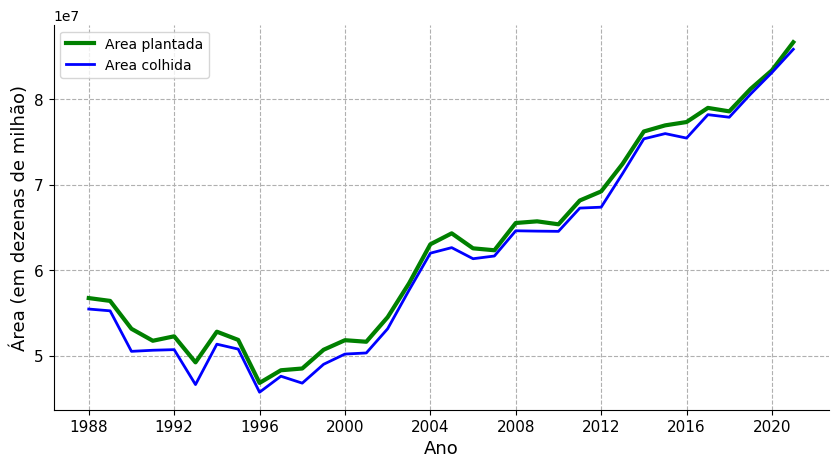

In [20]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(area_plantada_regiao.loc['Total', anos], lw = 3, color = 'g', label = 'Area plantada')
ax.plot(area_colhida_regiao.loc['Total', anos], lw = 2, color = 'blue', label = 'Area colhida')
ax.set_xlabel('Ano', fontsize = 13)
ax.set_ylabel('Área (em dezenas de milhão)', fontsize = 13)
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.grid(linestyle='--')
plt.show()

fig.savefig('plantacao_colheita_brasil.png', transparent = False, dpi = 300, bbox_inches = 'tight')

## **5.1 - Qual foi a produtividade do Brasil?**

In [21]:
area_brasil = area_plantada_brasil.copy()
area_brasil = area_brasil.melt(id_vars = ['Pais'], value_vars = anos, var_name = 'Ano', value_name = 'Area')

quantidade_brasil = quantidade_produzida_brasil.copy()
quantidade_brasil = quantidade_brasil.melt(id_vars = ['Pais'], value_vars = anos, var_name = 'Ano', value_name = 'Quantidade(kg)')
quantidade_brasil['Quantidade(kg)'] = quantidade_brasil['Quantidade(kg)'] * 1000

produtividade_brasil = area_brasil.assign(Quantidade = quantidade_brasil['Quantidade(kg)'])
produtividade_brasil.columns = ['Pais', 'Ano', 'Area', 'Quantidade(kg)']
produtividade_brasil['Produtividade(kg/ha)'] = produtividade_brasil['Quantidade(kg)'] / produtividade_brasil['Area']

display(area_brasil.head())
display(quantidade_brasil.head())
display(produtividade_brasil.head())

,Pais,Ano,Area
0,Brasil,1988,3594920
1,Brasil,1989,3408188
2,Brasil,1990,3349956
3,Brasil,1991,2064561
4,Brasil,1992,1973120


,Pais,Ano,Quantidade(kg)
0,Brasil,1988,5737971000
1,Brasil,1989,5552841000
2,Brasil,1990,3093791000
3,Brasil,1991,2916823000
4,Brasil,1992,2795598000


,Pais,Ano,Area,Quantidade(kg),Produtividade(kg/ha)
0,Brasil,1988,3594920,5737971000,1596.133155
1,Brasil,1989,3408188,5552841000,1629.264876
2,Brasil,1990,3349956,3093791000,923.531831
3,Brasil,1991,2064561,2916823000,1412.805434
4,Brasil,1992,1973120,2795598000,1416.841348


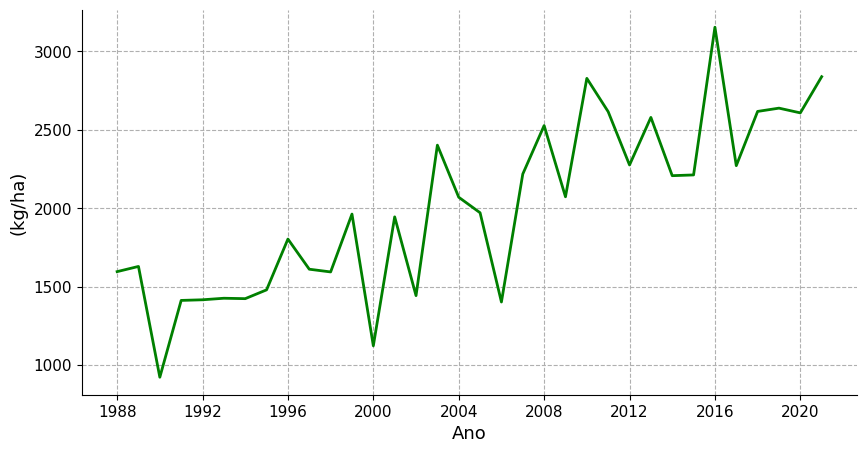

In [22]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(produtividade_brasil['Ano'], produtividade_brasil['Produtividade(kg/ha)'], lw = 2, color = 'g')
ax.set_xlabel('Ano', fontsize = 13)
ax.set_ylabel('(kg/ha)', fontsize = 13)
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linestyle='--')
plt.show()

fig.savefig('produtividade_brasil.png', transparent = False, dpi = 300, bbox_inches = 'tight')

## **5.2 - Qual país o Brasil mais importou trigo**

In [23]:
mais_importou = importacao_pais.copy()
mais_importou = mais_importou.melt(id_vars = ['Pais'], value_vars = [2019, 2020, 2021], var_name = 'Ano', value_name = 'Volume(ton/liq)')
mais_importou = mais_importou.groupby('Pais')['Volume(ton/liq)'].sum()
mais_importou

Pais
Argentina         15375939
Canada              237687
Estados Unidos     1055579
Paraguai            989206
Russia              357054
Uruguai             701866
Name: Volume(ton/liq), dtype: int64

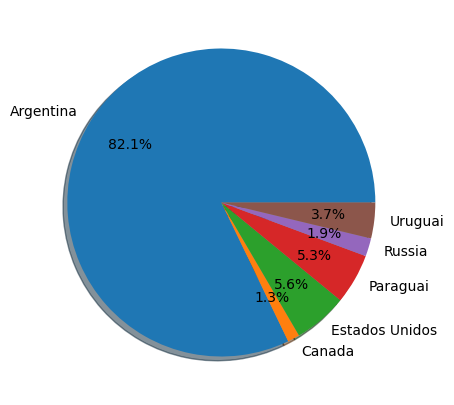

In [24]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.pie(mais_importou, labels = mais_importou.index,
         autopct = '%0.1f%%', shadow = True, pctdistance = 0.7)

plt.show()

fig.savefig('pizza_importacao_brasil.png', transparent = False, dpi = 100, bbox_inches = 'tight')

## **5.3 - Qual país mais importou trigo do Brasil**

In [25]:
mais_exportou = exportacao_pais.copy()
mais_exportou = mais_exportou.melt(id_vars = ['Pais'], value_vars = [2019, 2020, 2021], var_name = 'Ano', value_name = 'Volume(ton/liq)')
mais_exportou = mais_exportou.groupby('Pais')[['Volume(ton/liq)']].sum().sort_values('Volume(ton/liq)', ascending = False).head(5)
mais_exportou = mais_exportou.iloc[:, 0]
mais_exportou

Pais
Indonesia         607255
Vietna            580805
Arabia Saudita    373942
Filipinas         261148
Paquistao          65683
Name: Volume(ton/liq), dtype: int64

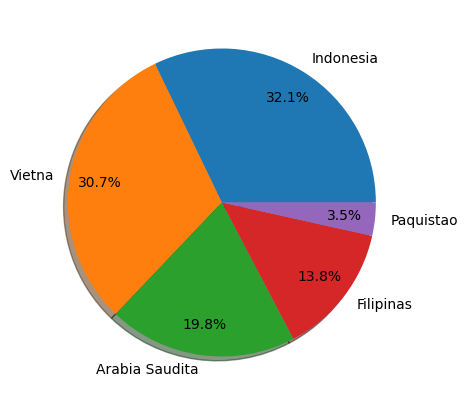

In [26]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.pie(mais_exportou, labels = mais_exportou.index,
         autopct = '%0.1f%%', pctdistance = 0.8, shadow = True)

plt.show()

fig.savefig('pizza_exportacao_brasil.png', transparent = False, dpi = 100, bbox_inches = 'tight')

# **6 - Analisando a produção por Região**

In [27]:
area_plantada = area_plantada_regiao.reset_index().copy()
area_plantada

,Regiao,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,Norte,1682423,2360519,1968752,1967119,2257442,2202295,2413668,2450271,2192795,...,2972418,3232726,3627845,3759487,4029599,4043178,4312330,4712142,5178672,97762348
1,Nordeste,14685229,14321937,12934412,13490443,13550964,11509921,13589143,13278429,10706352,...,11442041,12501736,12246714,11419435,11336911,11277738,11049599,11136821,11421322,415393436
2,Sudeste,12738304,12586765,12188201,12174413,12087219,11326494,11667910,11359773,10791387,...,14287231,14628759,14707236,14905786,14821058,14683115,15170061,15374638,15504216,436733484
3,Sul,18949173,18807454,18574922,17592576,17320180,16942083,17097150,16565732,15852223,...,20857716,21386148,21186782,21243901,21299307,21065460,21400782,21909991,22672953,646382394
4,Centro-Oeste,8691398,8338615,7486159,6528527,7057774,7245959,8047159,8198905,7279057,...,22874728,24481495,25179522,26008659,27503335,27516704,29277085,30252884,31895069,536784809
5,Total,56746527,56415290,53152446,51753078,52273579,49226752,52815030,51853110,46821814,...,72434134,76230864,76948099,77337268,78990210,78586195,81209857,83386476,86672232,2133056471


In [28]:
coluna_info = list(area_plantada.loc[:, 'Regiao':'Regiao'].columns)
coluna_info

['Regiao']

In [29]:
df_plantacao = area_plantada.melt(id_vars = coluna_info, value_vars = anos, var_name = 'Ano', value_name = 'Area')
df_plantacao

,Regiao,Ano,Area
0,Norte,1988,1682423
1,Nordeste,1988,14685229
2,Sudeste,1988,12738304
3,Sul,1988,18949173
4,Centro-Oeste,1988,8691398
...,...,...,...
199,Nordeste,2021,11421322
200,Sudeste,2021,15504216
201,Sul,2021,22672953
202,Centro-Oeste,2021,31895069


In [30]:
df_plantacao_new = df_plantacao.groupby('Regiao')['Area'].sum().head(5)
df_plantacao_new

Regiao
Centro-Oeste    536784809
Nordeste        415393436
Norte            97762348
Sudeste         436733484
Sul             646382394
Name: Area, dtype: int64

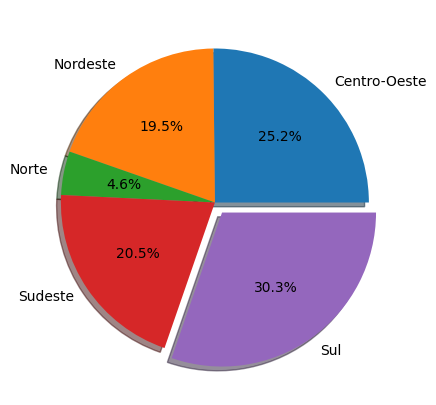

In [31]:
fig, ax = plt.subplots(figsize = (10, 5))

explodir = [0, 0, 0, 0, 0.08]

ax.pie(df_plantacao_new, labels = df_plantacao_new.index,
         autopct = '%0.1f%%', shadow = True, explode = explodir)

plt.show()

fig.savefig('pizza_distribuicao_brasil.png', transparent = False, dpi = 100, bbox_inches = 'tight')

## **6.1 - Produtividade da Região Sul**

In [32]:
df_plantacao_sul = df_plantacao.copy()
df_plantacao_sul = df_plantacao_sul.loc[df_plantacao_sul.Regiao == 'Sul']
df_plantacao_sul.reset_index(inplace = True, drop = True)
df_plantacao_sul.columns = ['Regiao', 'Ano', 'Area(ha)']
df_plantacao_sul.head()

,Regiao,Ano,Area(ha)
0,Sul,1988,18949173
1,Sul,1989,18807454
2,Sul,1990,18574922
3,Sul,1991,17592576
4,Sul,1992,17320180


In [33]:
quantidade_sul = quantidade_produzida_regiao.copy()
quantidade_sul.reset_index(inplace = True)
quantidade_sul = quantidade_sul.melt(id_vars = ['Regiao'], value_vars = anos, var_name = 'Ano', value_name = 'Quantidade(kg)')
quantidade_sul = quantidade_sul.loc[quantidade_sul.Regiao == 'Sul']
quantidade_sul.reset_index(inplace = True, drop = True)
quantidade_sul['Quantidade(kg)'] = quantidade_sul['Quantidade(kg)'] * 1000
quantidade_sul.head()

# transformando toneladas em kg

,Regiao,Ano,Quantidade(kg)
0,Sul,1988,4936438000
1,Sul,1989,4795170000
2,Sul,1990,2670968000
3,Sul,1991,2612134000
4,Sul,1992,2565465000


In [34]:
quantidade_sul_values = quantidade_sul['Quantidade(kg)'].values
quantidade_sul_values

array([4936438000, 4795170000, 2670968000, 2612134000, 2565465000,
       2011140000, 1957518000, 1457089000, 3171456000, 2385577000,
       2174404000, 2319513000, 1638943000, 3168533000, 2895090000,
       5770853000, 5302556000, 4263685000, 2205502000, 3853557000,
       5590635000, 4670107000, 5803207000, 5419061000, 4144280000,
       5501542000, 5748132000, 4853936000, 6120603000, 3647362000,
       4828920000, 4842569000, 5402126000, 7097820000])

In [35]:
produtividade_sul = df_plantacao_sul.copy()
produtividade_sul = produtividade_sul.assign(Quantidade = quantidade_sul_values)
produtividade_sul.columns = ['Regiao', 'Ano', 'Area(ha)', 'Quantidade(kg)']
produtividade_sul['Produtividade(kg/ha)'] = produtividade_sul['Quantidade(kg)']/produtividade_sul['Area(ha)']
produtividade_sul.head()

,Regiao,Ano,Area(ha),Quantidade(kg),Produtividade(kg/ha)
0,Sul,1988,18949173,4936438000,260.509416
1,Sul,1989,18807454,4795170000,254.961145
2,Sul,1990,18574922,2670968000,143.794305
3,Sul,1991,17592576,2612134000,148.479336
4,Sul,1992,17320180,2565465000,148.119996


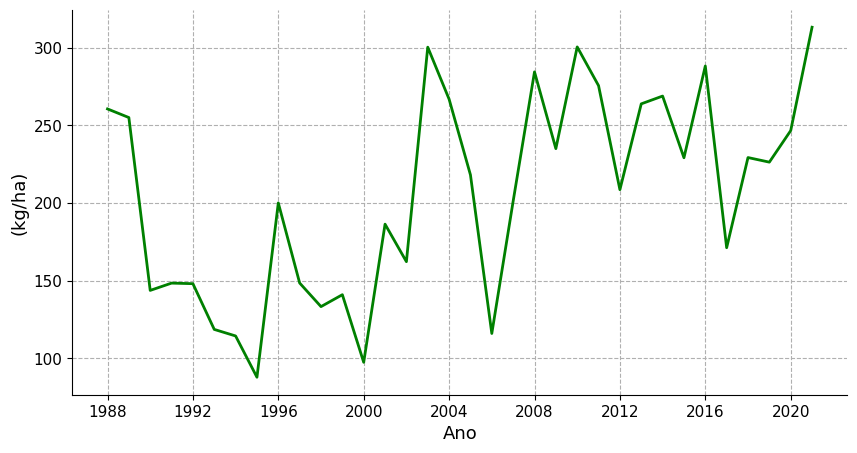

In [36]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(produtividade_sul['Ano'], produtividade_sul['Produtividade(kg/ha)'], lw = 2, color = 'g')
ax.set_xlabel('Ano', fontsize = 13)
ax.set_ylabel('(kg/ha)', fontsize = 13)
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linestyle='--')
plt.show()

fig.savefig('produtividade_sul.png', transparent = False, dpi = 300, bbox_inches = 'tight')

# **7 - Analisando a produção dos estados na Região Sul**

In [37]:
area_plantada_sul = area_plantada_estado.copy()
area_plantada_sul = area_plantada_sul.loc[['Rio Grande do Sul', 'Paraná', 'Santa Catarina'], anos]
area_plantada_sul

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Estado,,,,,,,,,,,,,,,,,,,,,
Rio Grande do Sul,1051188,814471,988248,624923,486964,598339,554349,298934,565589,496543,...,989534,1059032,1181979,882566,779045,691563,709558,760914,953832,1231978
Paraná,1850876,1922374,1826626,1144471,1183143,722504,739824,639828,1107079,959714,...,793448,997656,1388388,1320984,1101814,944263,1099866,1035444,1117241,1154181
Santa Catarina,112595,97857,108143,81084,72085,79190,61370,36825,72062,36635,...,66591,79294,94974,74520,64325,51425,54841,48737,58367,96948


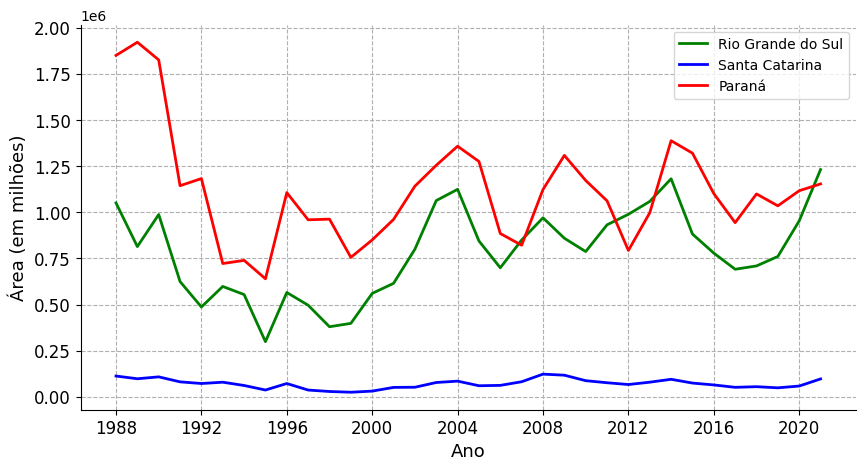

In [38]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(area_plantada_sul.loc['Rio Grande do Sul', anos], color = 'g', label = 'Rio Grande do Sul', lw = 2)
ax.plot(area_plantada_sul.loc['Santa Catarina', anos], color = 'b', label = 'Santa Catarina', lw = 2)
ax.plot(area_plantada_sul.loc['Paraná', anos], color = 'red', label = 'Paraná', lw = 2)
ax.set_xlabel('Ano', fontsize = 13)
ax.set_ylabel('Área (em milhões)', fontsize = 13)
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linestyle='--')
plt.legend()
plt.show()

fig.savefig('area_plantada_estados_sul.png', transparent = False, dpi = 300, bbox_inches = 'tight')

## **7.1 - Produtividade dos Estados do Sul**

In [39]:
area_plantada_estado_sul = area_plantada_estado.copy()
area_plantada_estado_sul = area_plantada_estado_sul.loc[['Rio Grande do Sul', 'Paraná', 'Santa Catarina'], anos]
area_plantada_estado_sul.reset_index(inplace = True)
area_plantada_estado_sul = area_plantada_estado_sul.melt(id_vars = ['Estado'], value_vars = anos, var_name = 'Ano', value_name = 'Area(ha)')
area_plantada_estado_sul.head()

,Estado,Ano,Area(ha)
0,Rio Grande do Sul,1988,1051188
1,Paraná,1988,1850876
2,Santa Catarina,1988,112595
3,Rio Grande do Sul,1989,814471
4,Paraná,1989,1922374


In [40]:
quantidade_produzida_estado_sul = quantidade_produzida_estado.copy()
quantidade_produzida_estado_sul = quantidade_produzida_estado_sul.loc[['Rio Grande do Sul', 'Paraná', 'Santa Catarina'], anos]
quantidade_produzida_estado_sul.reset_index(inplace = True)
quantidade_produzida_estado_sul = quantidade_produzida_estado_sul.melt(id_vars = ['Estado'], value_vars = anos, var_name = 'Ano', value_name = 'Quantidade(kg)')
quantidade_produzida_estado_sul['Quantidade(kg)'] = quantidade_produzida_estado_sul['Quantidade(kg)'] * 1000
quantidade_produzida_estado_sul.head()

,Estado,Ano,Quantidade(kg)
0,Rio Grande do Sul,1988,1605043000
1,Paraná,1988,3250000000
2,Santa Catarina,1988,81395000
3,Rio Grande do Sul,1989,1461726000
4,Paraná,1989,3207000000


In [41]:
produtividade_estados_sul = area_plantada_estado_sul.copy()
produtividade_estados_sul = produtividade_estados_sul.assign(Quantidade = quantidade_produzida_estado_sul['Quantidade(kg)'])
produtividade_estados_sul.columns = ['Estado', 'Ano', 'Area(ha)', 'Quantidade(kg)']
produtividade_estados_sul['Produtividade(kg/ha)'] = produtividade_estados_sul['Quantidade(kg)']/produtividade_estados_sul['Area(ha)']
produtividade_estados_sul

,Estado,Ano,Area(ha),Quantidade(kg),Produtividade(kg/ha)
0,Rio Grande do Sul,1988,1051188,1605043000,1526.884820
1,Paraná,1988,1850876,3250000000,1755.925302
2,Santa Catarina,1988,112595,81395000,722.900662
3,Rio Grande do Sul,1989,814471,1461726000,1794.693734
4,Paraná,1989,1922374,3207000000,1668.249779
...,...,...,...,...,...
97,Paraná,2020,1117241,3123952000,2796.130826
98,Santa Catarina,2020,58367,171727000,2942.193363
99,Rio Grande do Sul,2021,1231978,3547866000,2879.812789
100,Paraná,2021,1154181,3231985000,2800.241037


In [42]:
produtividade_rs = produtividade_estados_sul.loc[produtividade_estados_sul.Estado == 'Rio Grande do Sul']
display(produtividade_rs.head())

produtividade_parana = produtividade_estados_sul.loc[produtividade_estados_sul.Estado == 'Paraná']
display(produtividade_parana.head())

produtividade_santa_catarina = produtividade_estados_sul.loc[produtividade_estados_sul.Estado == 'Santa Catarina']
display(produtividade_santa_catarina.head())

,Estado,Ano,Area(ha),Quantidade(kg),Produtividade(kg/ha)
0,Rio Grande do Sul,1988,1051188,1605043000,1526.884820
3,Rio Grande do Sul,1989,814471,1461726000,1794.693734
6,Rio Grande do Sul,1990,988248,1168628000,1182.525034
9,Rio Grande do Sul,1991,624923,682684000,1092.428987
12,Rio Grande do Sul,1992,486964,903139000,1854.631965


,Estado,Ano,Area(ha),Quantidade(kg),Produtividade(kg/ha)
1,Paraná,1988,1850876,3250000000,1755.925302
4,Paraná,1989,1922374,3207000000,1668.249779
7,Paraná,1990,1826626,1394052000,763.184144
10,Paraná,1991,1144471,1825929000,1595.434921
13,Paraná,1992,1183143,1556005000,1315.145337


,Estado,Ano,Area(ha),Quantidade(kg),Produtividade(kg/ha)
2,Santa Catarina,1988,112595,81395000,722.900662
5,Santa Catarina,1989,97857,126444000,1292.130353
8,Santa Catarina,1990,108143,108288000,1001.340817
11,Santa Catarina,1991,81084,103521000,1276.713038
14,Santa Catarina,1992,72085,106321000,1474.939308


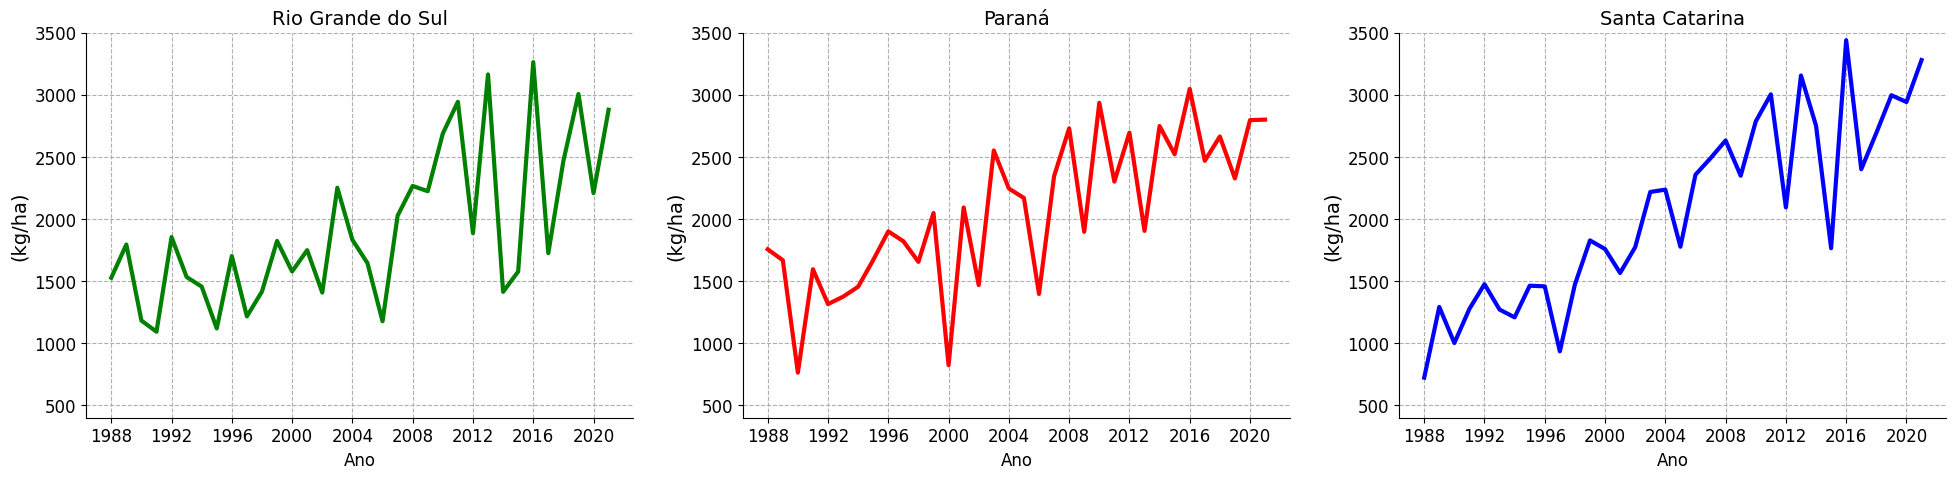

In [43]:
plt.figure(figsize = (24, 5))

ax = plt.subplot(1, 3, 1)
ax.plot(anos, produtividade_rs['Produtividade(kg/ha)'], color = 'g', lw = 3)
ax.set_title('Rio Grande do Sul', fontsize = 14)
ax.set_xlabel('Ano', fontsize = 12)
ax.set_ylabel('(kg/ha)', fontsize = 14)
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_ylim(400, 3500)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle = '--')

ax2 = plt.subplot(1, 3, 2)
ax2.plot(anos, produtividade_parana['Produtividade(kg/ha)'], color = 'red', lw = 3)
ax2.set_title('Paraná', fontsize = 14)
ax2.set_xlabel('Ano', fontsize = 12)
ax2.set_ylabel('(kg/ha)', fontsize = 14)
ax2.xaxis.set_major_locator(plt.MultipleLocator(4))
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)
ax2.set_ylim(400, 3500)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(linestyle = '--')

ax3 = plt.subplot(1, 3, 3)
ax3.plot(anos, produtividade_santa_catarina['Produtividade(kg/ha)'], color = 'b', lw = 3)
ax3.set_title('Santa Catarina', fontsize = 14)
ax3.set_xlabel('Ano', fontsize = 12)
ax3.set_ylabel('(kg/ha)', fontsize = 14)
ax3.xaxis.set_major_locator(plt.MultipleLocator(4))
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)
ax3.set_ylim(400, 3500)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(linestyle = '--')

plt.show()

# plt.savefig('produtividade_estados_sul.png', transparent = False, dpi = 300, bbox_inches = 'tight')

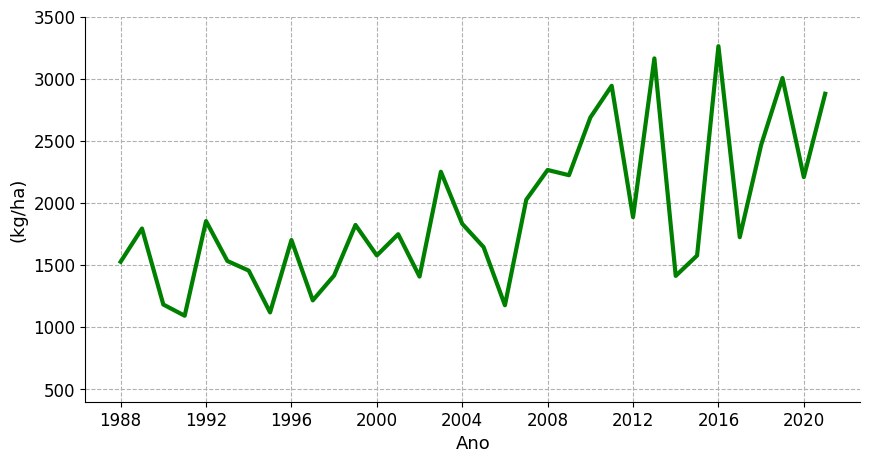

In [44]:
# produtividade Rio Grande do Sul

fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(anos, produtividade_rs['Produtividade(kg/ha)'], color = 'g', label = 'Rio Grande do Sul', lw = 3)
ax.set_xlabel('Ano', fontsize = 13)
ax.set_ylabel('(kg/ha)', fontsize = 13)
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_ylim(400, 3500)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linestyle='--')
plt.show()

fig.savefig('produtividade_rs.png', transparent = False, dpi = 300, bbox_inches = 'tight')

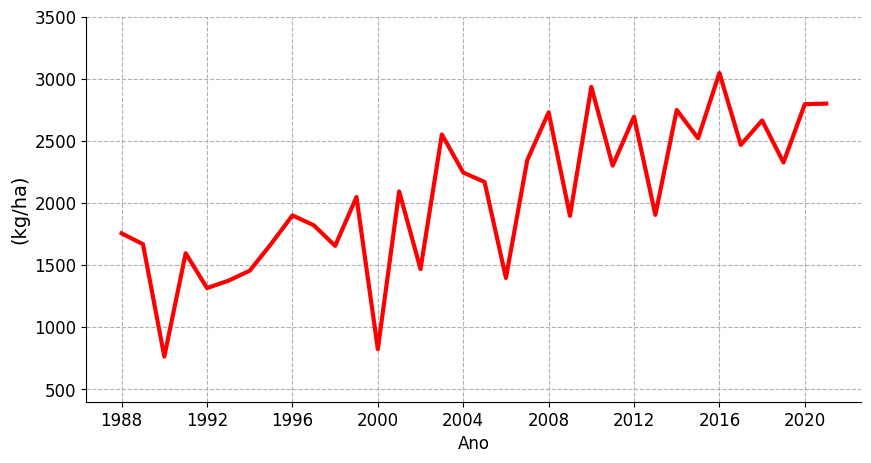

In [45]:
# Produtividade Paraná
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(anos, produtividade_parana['Produtividade(kg/ha)'], color = 'red', lw = 3)
ax.set_xlabel('Ano', fontsize = 12)
ax.set_ylabel('(kg/ha)', fontsize = 14)
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_ylim(400, 3500)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle = '--')
plt.show()

fig.savefig('produtividade_parana.png', transparent = False, dpi = 300, bbox_inches = 'tight')

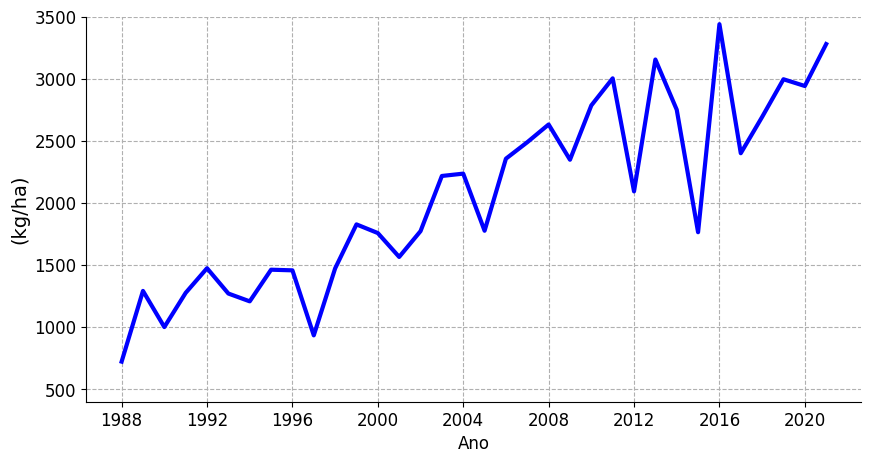

In [46]:
# Produtividade Santa Catarina
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(anos, produtividade_santa_catarina['Produtividade(kg/ha)'], color = 'b', lw = 3)
ax.set_xlabel('Ano', fontsize = 12)
ax.set_ylabel('(kg/ha)', fontsize = 14)
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_ylim(400, 3500)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle = '--')
plt.show()

fig.savefig('produtividade_santa_catarina.png', transparent = False, dpi = 300, bbox_inches = 'tight')